## Project Report


*Group 28 - Calvin Choi and Mikel Ibarra Gallardo*

In [2]:
# Loading libraries
library(readxl)
library(ggplot2)                     
library(GGally)
library(cowplot)
library(dplyr)
library(gridExtra)
library(repr)
library(infer)
library(repr)
library(tidyverse)
library(tidymodels)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ modeldata    1.0.1     ✔ workflows   

### Introduction

With the interconnected nature of the internet, one prominent feature is the use of "review" websites or platforms, with there being a wide variety of review platforms for different things. Goodreads for books, Trip Advisor for hotels and restaurants, Letterboxd for movies and tv shows, and a multitude of others. One of the most commmon of these websites is Google, as it provides a platform to review almost anything, from a pool to a park to a zoo. The UCI Travel Review Ratings Data Set (https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings#) compiles the ratings from different users across a wide range of places. It includes two types of places which we will be looking at: dance clubs and pubs/bars, both being integral to nightlife within cities.

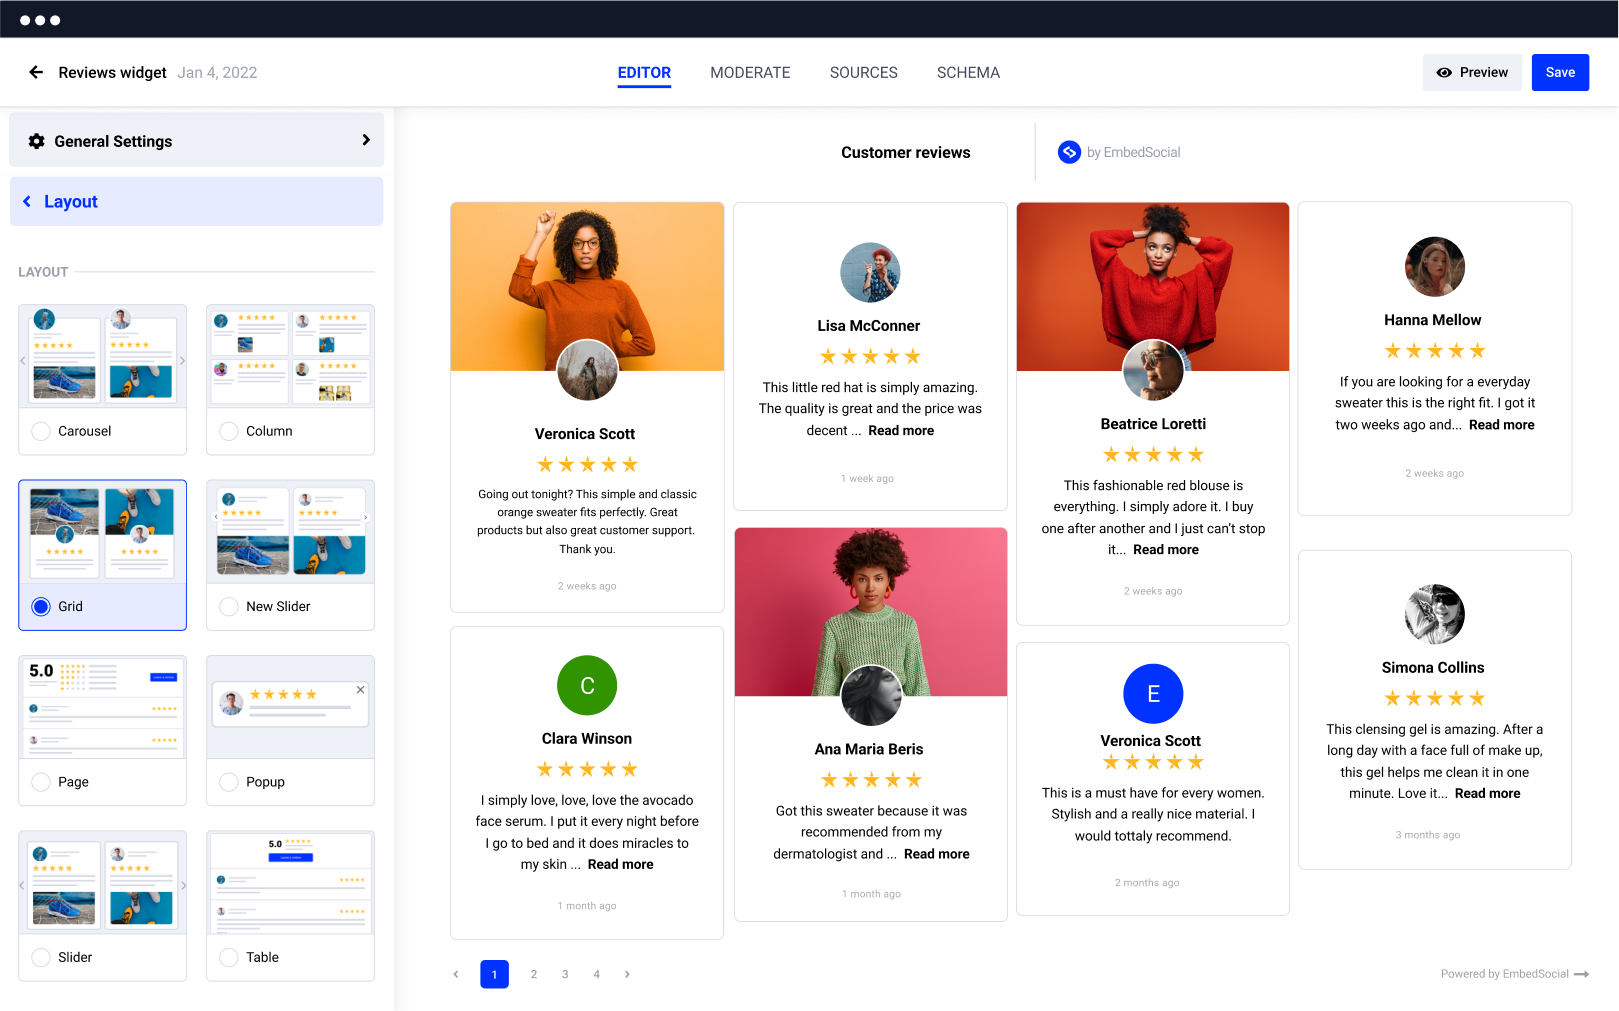

*Image from EmbedSocial*

However, one might ask, what value do online reviews hold? When analyzing them, studies have found that online reviews function as a sort of online word of mouth advertising. Weejing Duan, Bin Gu, and Andrew B. Whinston found the extent to which online reviews affected businesses, with them affecting box office numbers, but also being affected by sales of a product (Duan et al., 2008). Online ratings are so impactful, that entire studies, such as the one conducted by Daniel Keller & Maria Kostrominita, centered around giving businesses the best possible route to improving their scores on websites. The mentioned study found critical areas to focus on, such as food quality, service, and over all experience, but also highlighted how not all of these are equally important (Keller & Kostromitina, 2020).

From this, we are looking to answer the following question: Between pubs/restaurants and dance club, which of the two has lower ratings? The reason as to why we're asking this is because through our findings, our results could be interpreted as indicators for advertisement companies for which of the two kinds of location they should focus on. Possibly, it could also be an indicator for tourism companies or organizations as to what kinds of businesses need more help with advertising.

Our preliminary results show us that the average reviewer rates bars higher than they rate dance clubs, we want to further investigate and analyze to see how true this hypothesis by doing a 2 sample t-test and potentially a regression analysis on the data we have using bootstrapping and sampling.

Our hypotheses are as follows:

- Null : Mu Bar - Mu Dance <= 0
- Alternative : Mu Bar - Mu Dance > 0

### Methods & Results

In [3]:
# Reading the data into R & cleaning it
AStat <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00485/google_review_ratings.csv") |>
            # read csv from (https://archive.ics.uci.edu/ml/machine-learning-databases/00485/google_review_ratings.csv)
    select(!...26)

head(AStat)

New names:
• `` -> `...26`
Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 5456 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): User
dbl (24): Category 1, Category 2, Category 3, Category 4, Category 5, Catego...
lgl  (1): ...26

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,⋯,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
User 1,0,0.0,3.63,3.65,5,2.92,5,2.35,2.33,⋯,1.74,0.59,0.5,0,0.5,0,0,0,0,0
User 2,0,0.0,3.63,3.65,5,2.92,5,2.64,2.33,⋯,1.74,0.59,0.5,0,0.5,0,0,0,0,0
User 3,0,0.0,3.63,3.63,5,2.92,5,2.64,2.33,⋯,1.74,0.59,0.5,0,0.5,0,0,0,0,0
User 4,0,0.5,3.63,3.63,5,2.92,5,2.35,2.33,⋯,1.74,0.59,0.5,0,0.5,0,0,0,0,0
User 5,0,0.0,3.63,3.63,5,2.92,5,2.64,2.33,⋯,1.74,0.59,0.5,0,0.5,0,0,0,0,0
User 6,0,0.0,3.63,3.63,5,2.92,5,2.63,2.33,⋯,1.74,0.59,0.5,0,0.5,0,0,0,0,0


Filtering our data and visualization the raw data using GGPairs to get a feel for what we are working with

Bar_and_Pub_Rating,DanceClub_Rating
<dbl>,<dbl>
1.41,0.50
1.40,0.50
1.39,0.50
1.38,0.51
1.37,0.54
1.37,0.51


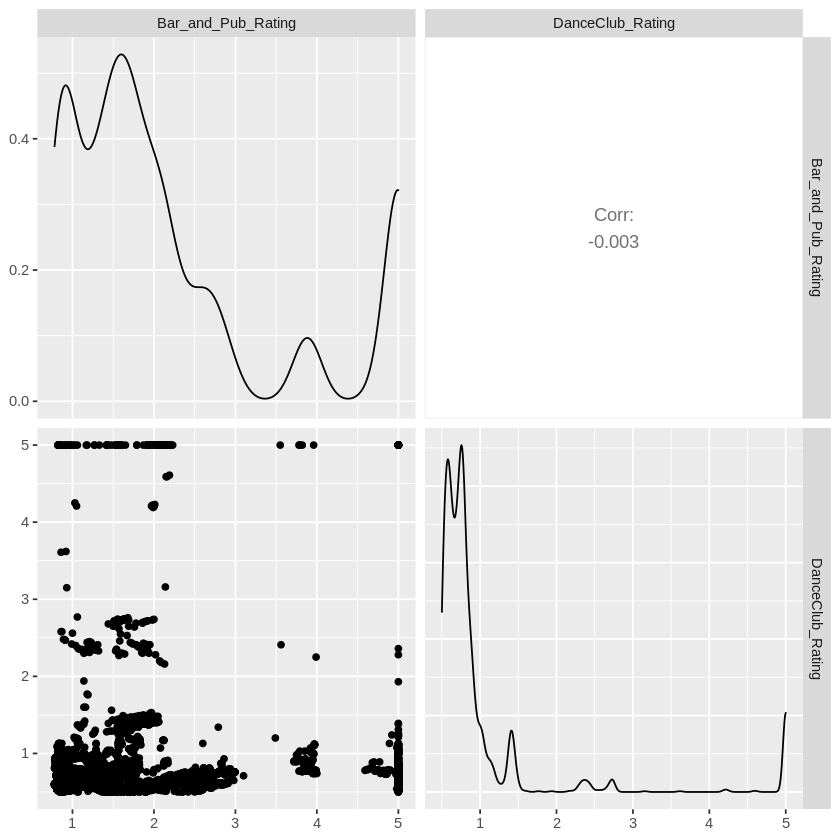

In [4]:
#getting Bar & Pub rating and Dance club ratings.
AStat_filtered <- AStat |>
    select('Category 12', 'Category 18') |>
    rename(Bar_and_Pub_Rating = 'Category 12', DanceClub_Rating = 'Category 18') |>
    filter(Bar_and_Pub_Rating != 0, DanceClub_Rating != 0) #filter for venues with ratings in both categories

head(AStat_filtered)
ggpairs(AStat_filtered)

In [5]:
mu_tb <- summarize(AStat_filtered, "Mean Bar/Pub Rating" = mean(Bar_and_Pub_Rating), "Mean Dance Club Rating" = mean(DanceClub_Rating))
st_tb <- summarize(AStat_filtered, 'Standard Deviation Bar/Pub Rating' = sd(Bar_and_Pub_Rating),
                   'Standard Deviation Dance Club Rating' = sd(DanceClub_Rating))
mu_tb
st_tb

Mean Bar/Pub Rating,Mean Dance Club Rating
<dbl>,<dbl>
2.172355,1.010827


Standard Deviation Bar/Pub Rating,Standard Deviation Dance Club Rating
<dbl>,<dbl>
1.326789,0.9561085


#### 90% Confidence Interval

In [ ]:
mean_ci <- tibble(
    lower_ci = qt(0.05, df = nrow(AStat_filtered) - 1) * std_error + x_bar,
    upper_ci = qt(0.95, df = nrow(AStat_filtered) - 1) * std_error + x_bar)

#### Pooled T-Test

In [12]:
pooled_ttest <- t.test(AStat_filtered$Bar_and_Pub_Rating - AStat_filtered$DanceClub_Rating, alternative = "greater", var.equal = TRUE) |>
tidy()
null

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1.161528,2.172355,1.010827,47.31523,0,8874,1.121144,Inf,Two Sample t-test,greater


## References
Keller, D., & Kostromitina, M. (2020). Characterizing non-chain Restaurants’ Yelp Star-Ratings: Generalizable findings from a representative sample of yelp reviews. International Journal of Hospitality Management, 86, 102440. https://doi.org/10.1016/j.ijhm.2019.102440

Duan, W., Gu, B., & Whinston, A. B. (2008). Do online reviews matter? — an empirical investigation of panel data. Decision Support Systems, 45(4), 1007–1016. https://doi.org/10.1016/j.dss.2008.04.001